In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [43]:
head = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
def show(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(head[y[index]])

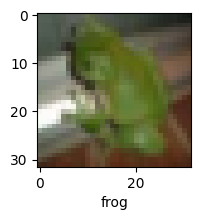

In [10]:
show(x_test, y_test, 7)

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
def show_loss_and_acc(history):
    df = pd.DataFrame(history.history)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(df['loss'], label='Training Loss')
    if 'val_loss' in df:
        plt.plot(df['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    if 'accuracy' in df:
        plt.plot(df['accuracy'], label='Training Accuracy')
        if 'val_accuracy' in df:
            plt.plot(df['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [13]:
from tensorflow.keras.utils import to_categorical, plot_model

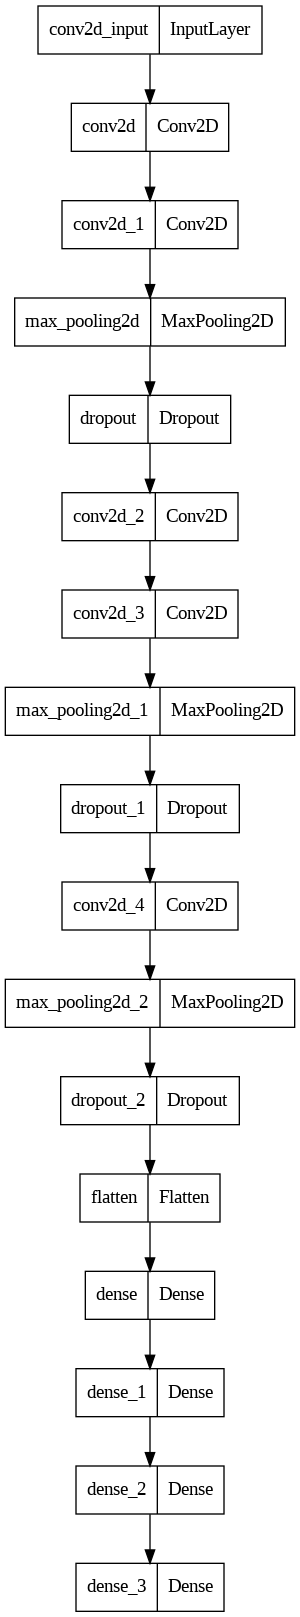

In [14]:
tf.random.set_seed(42)

model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(80, activation='relu'),

    layers.Dense(10, activation='softmax')
])

plot_model(model2)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
x_train2 = x_train.reshape(50000, 32, 32, 3)
x_test2 = x_test.reshape(10000, 32, 32, 3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train2, y_train, epochs=50, batch_size=56, verbose=True, validation_data=(x_test2, y_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/50
893/893 [==============================] - 18s 14ms/step - loss: 1.8212 - accuracy: 0.3100 - val_loss: 1.4844 - val_accuracy: 0.4616
Epoch 2/50
893/893 [==============================] - 11s 13ms/step - loss: 1.3803 - accuracy: 0.4982 - val_loss: 1.2292 - val_accuracy: 0.5577
Epoch 3/50
893/893 [==============================] - 12s 13ms/step - loss: 1.1847 - accuracy: 0.5794 - val_loss: 1.1036 - val_accuracy: 0.6149
Epoch 4/50
893/893 [==============================] - 11s 12ms/step - loss: 1.0550 - accuracy: 0.6288 - val_loss: 1.0171 - val_accuracy: 0.6548
Epoch 5/50
893/893 [==============================] - 11s 12ms/step - loss: 0.9588 - accuracy: 0.6646 - val_loss: 0.9040 - val_accuracy: 0.6867
Epoch 6/50
893/893 [==============================] - 12s 14ms/step - loss: 0.8954 - accuracy: 0.6876 - val_loss: 0.8539 - val_accuracy: 0.7012
Epoch 7/50
893/893 [==============================] - 11s 12ms/step - loss

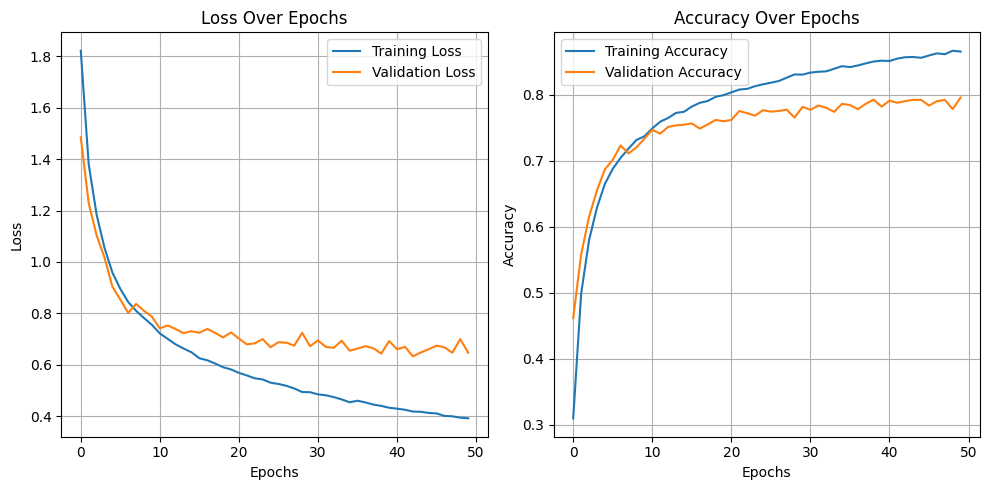

In [17]:
show_loss_and_acc(history2)

In [18]:
model2.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
!cp '/content/model.h5' '/content/drive/MyDrive/'

313/313 [==============================] - 1s 3ms/step


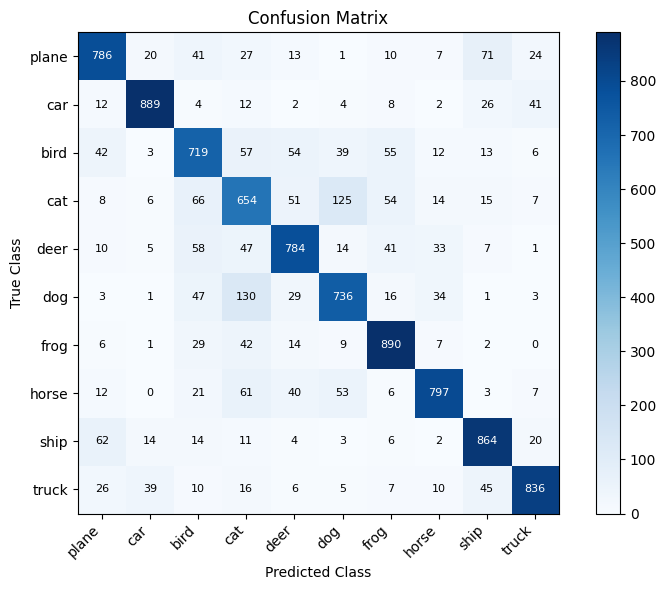

Classification Report:
              precision    recall  f1-score   support

       plane       0.81      0.79      0.80      1000
         car       0.91      0.89      0.90      1000
        bird       0.71      0.72      0.72      1000
         cat       0.62      0.65      0.64      1000
        deer       0.79      0.78      0.79      1000
         dog       0.74      0.74      0.74      1000
        frog       0.81      0.89      0.85      1000
       horse       0.87      0.80      0.83      1000
        ship       0.83      0.86      0.84      1000
       truck       0.88      0.84      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [73]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = model2.predict(x_test2)
y_test_classes = np.argmax(y_test, axis=1)

y_pred = np.argmax(predictions, axis=1)
conf_mat = confusion_matrix(y_test_classes, y_pred)

predicted_class_names = [name for name in head]
true_class_names = [name for name in head]

plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

plt.xticks(np.arange(len(predicted_class_names)), predicted_class_names, rotation=45, ha='right')
plt.yticks(np.arange(len(true_class_names)), true_class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center',
                 color='white' if conf_mat[i, j] > conf_mat.max() / 2 else 'black',
                 fontsize=8)

plt.tight_layout()
plt.show()

class_report = classification_report(y_test_classes, y_pred, target_names=head)
print("Classification Report:")
print(class_report)


In [74]:
def plot_image(i, predictions_array, true_label, img):

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)

  if predicted_label == true_label:
    color='blue'

  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(head[predicted_label],
                                       100*np.max(predictions_array),
                                       head[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

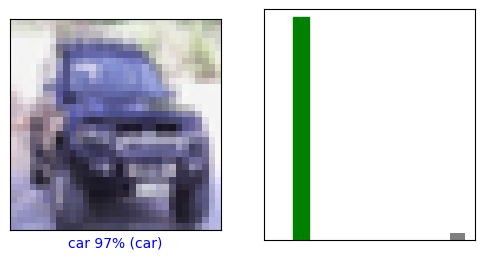

In [79]:
i=9
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plot_image(i, predictions, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)
plt.show()

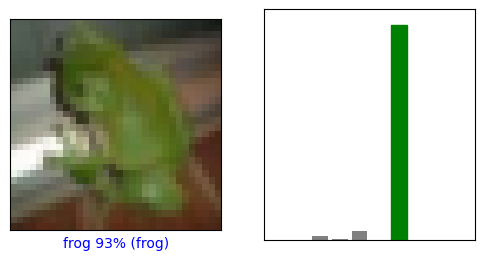

In [76]:
i=7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

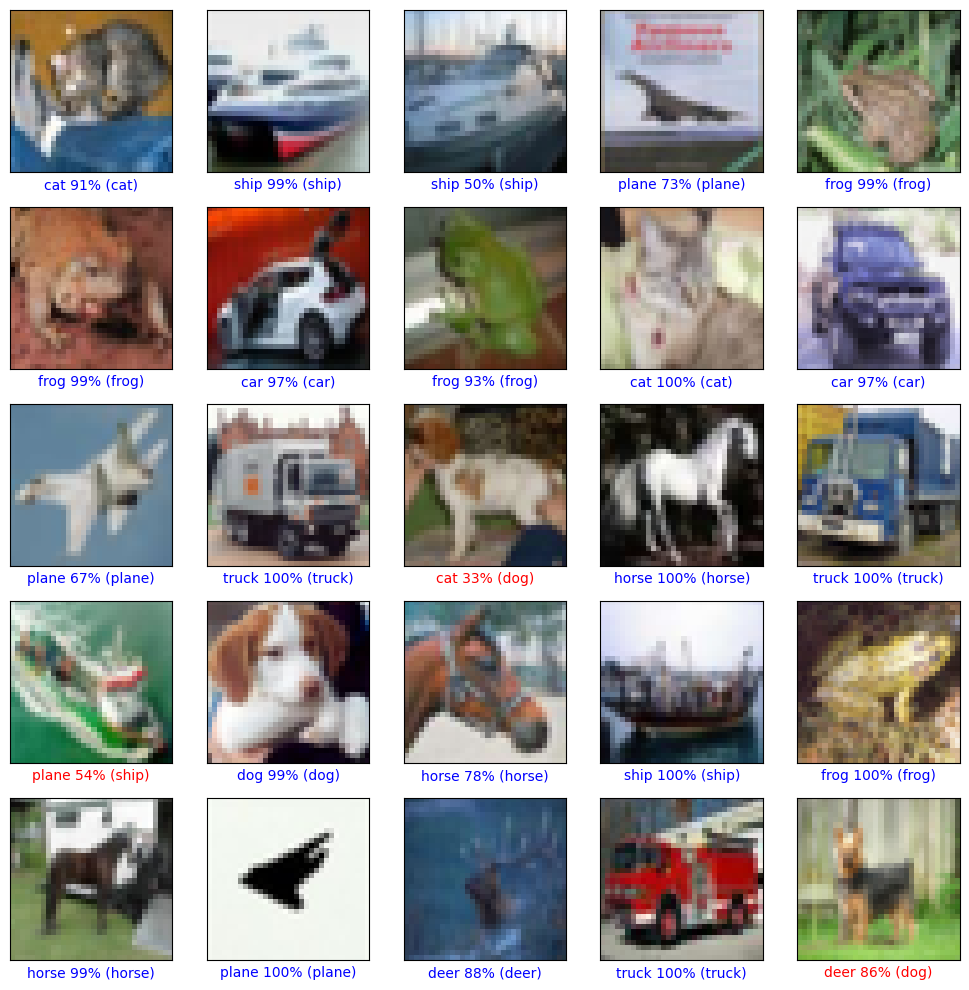

In [77]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plot_image(i, predictions, y_test, x_test)

plt.tight_layout()
plt.show()

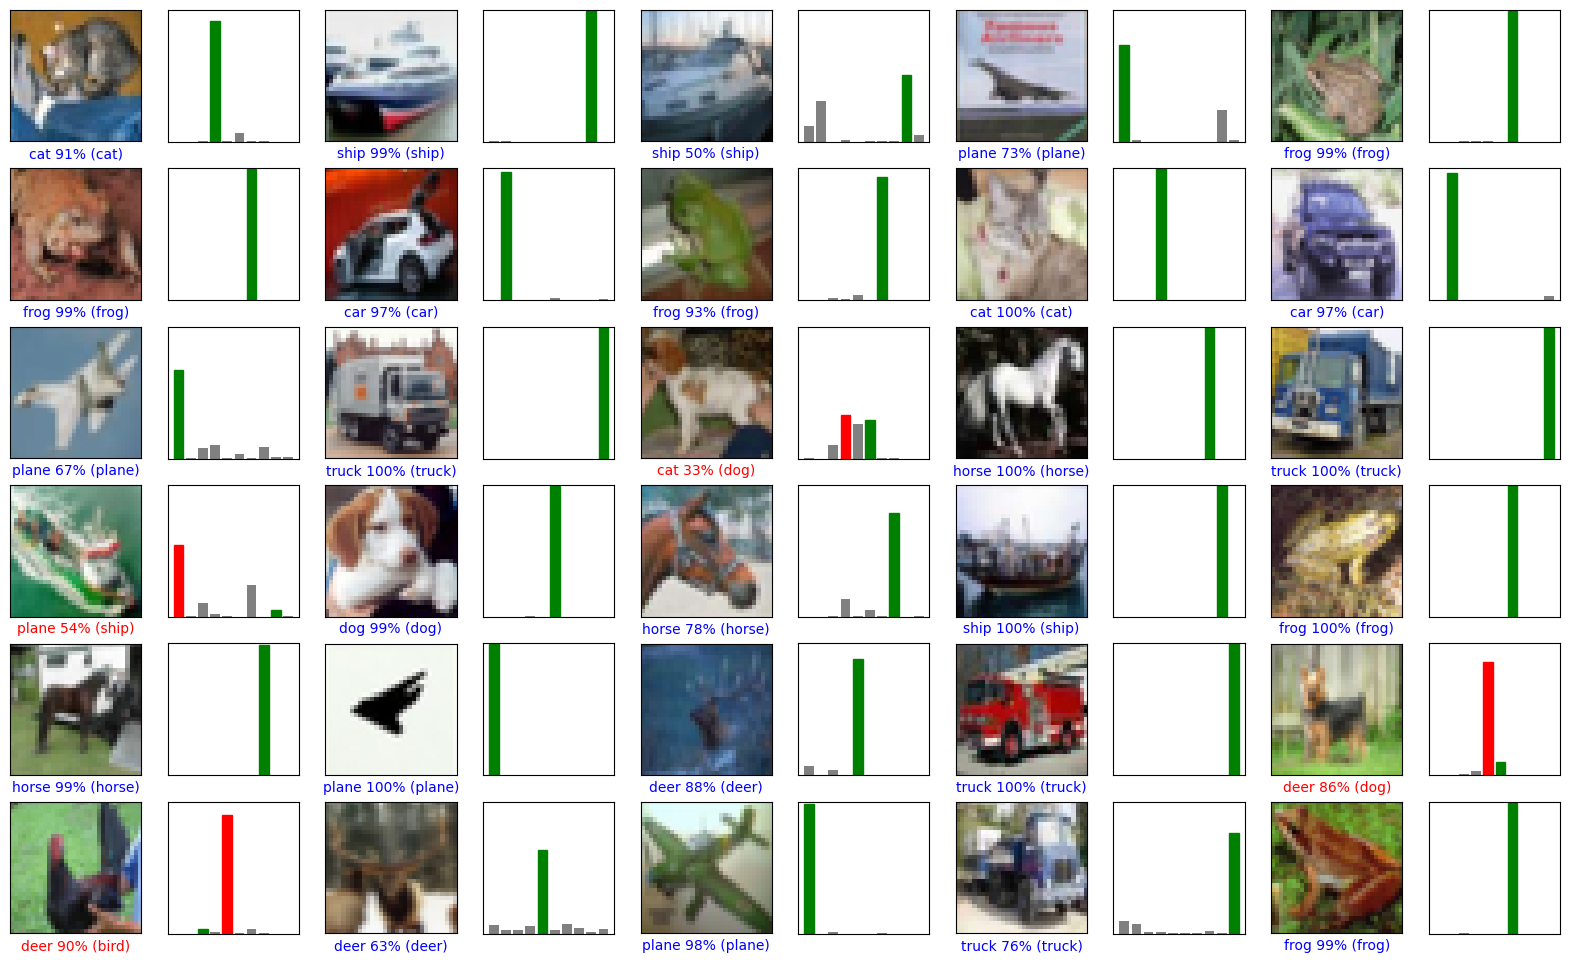

In [78]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)

plt.show()

In [81]:
print('Completed!!')

Completed!!
